# Customer Segmentation using unsupervised learning

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

## Reading files of .csv format and storing as a dataframe

In [2]:
df=pd.read_csv('Marketing_data.csv')
df.head(30)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## Need to know information about dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Heatmap to detect nullvalues

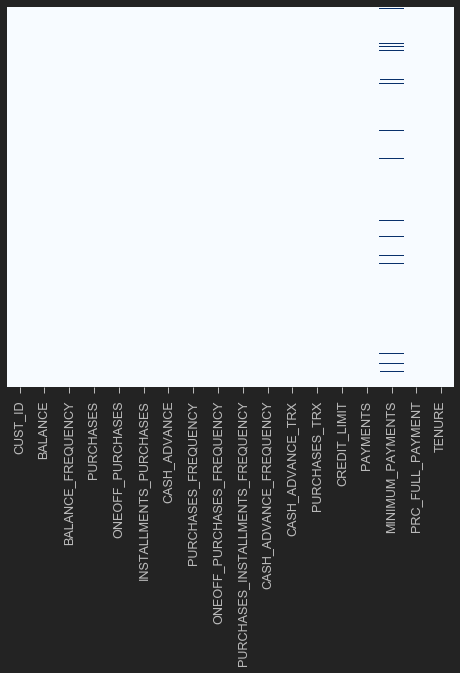

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [6]:
df.isnull().sum() #minimum_payments=313, credit_limit=1

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Replacing null values with mean of other values

In [7]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

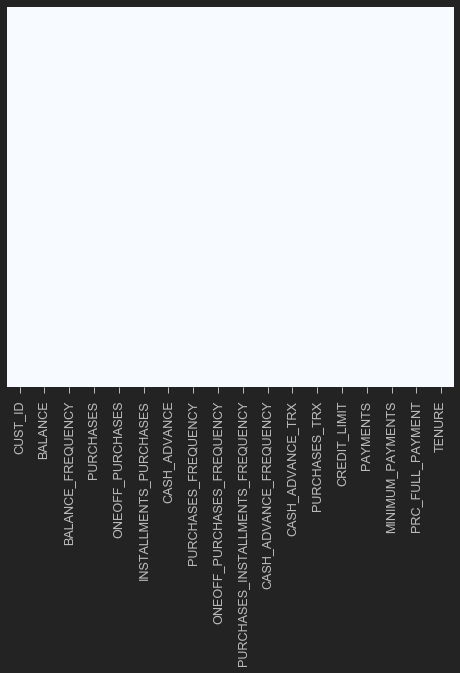

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [9]:
df.isnull().sum() #all null values

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## we will now check for duplicate values in all columns

In [10]:
df.duplicated().sum()

0

## droping unnecessary columns

In [11]:
df.drop('CUST_ID',axis=1,inplace=True)

## ploting a distplot

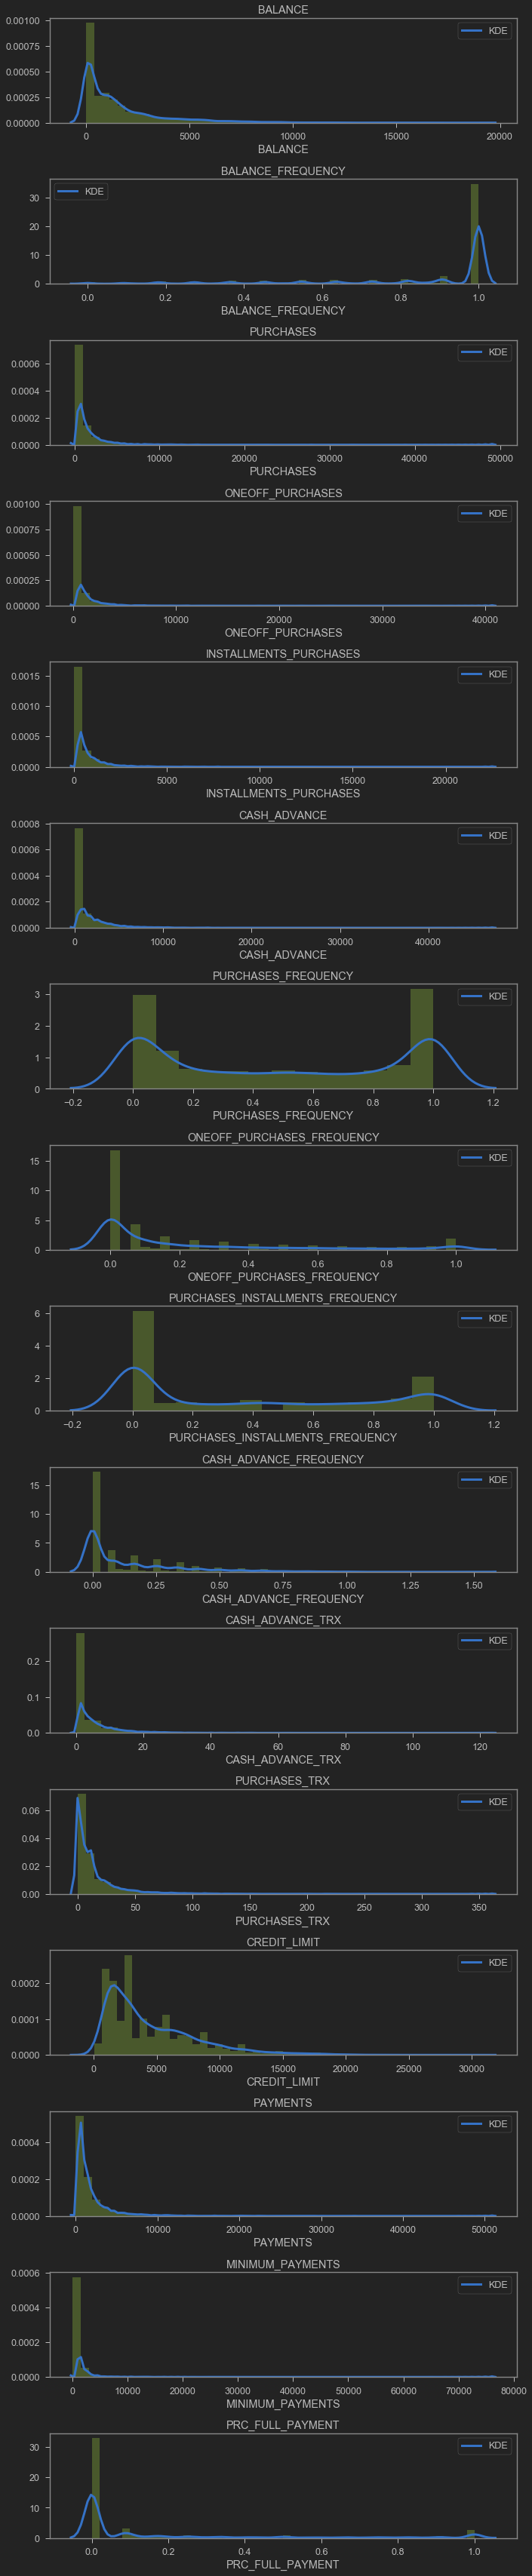

In [12]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)-1):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])
plt.tight_layout()

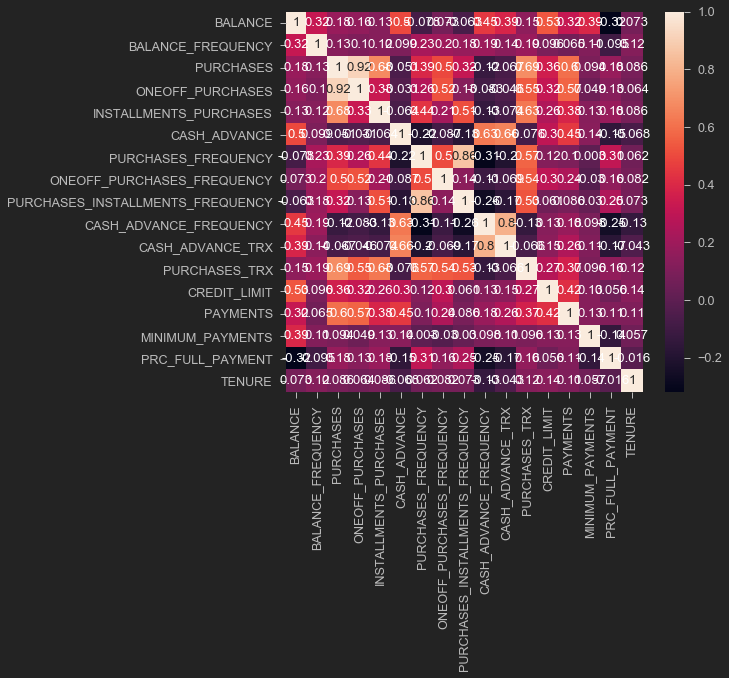

In [13]:
correlations=df.corr()
sns.heatmap(correlations,annot=True)

# scaling our data

In [14]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)

In [15]:
df_scaled.shape

(8950, 17)

In [16]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

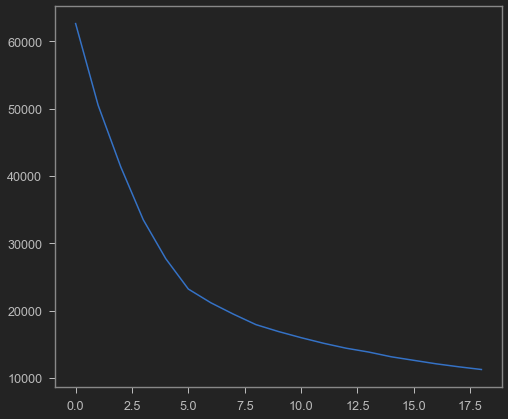

In [17]:
scores_1=[ ]
range_values = range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled[:,:7])
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1,'bx-')

### we need to have optimal number of clusters thus we are using elbow method
### we plotted graph between k and number of clusters above and now we take elbow part
# Now we are appling K-means method

In [18]:
kmeans=KMeans(7)
kmeans.fit(df_scaled)
labels=kmeans.labels_

In [19]:
kmeans.cluster_centers_.shape

(7, 17)

In [20]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])

In [21]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.370507,0.331651,-0.042677,-0.233296,0.327525,-0.369208,0.974105,-0.352880,1.164385,-0.479031,-0.363552,0.167284,-0.277455,-0.224944,-0.030559,0.301783,0.252894
1,1.674275,0.393268,-0.204558,-0.149410,-0.209268,2.000244,-0.453795,-0.188935,-0.402833,1.911567,1.925005,-0.242096,1.013513,0.837772,0.555971,-0.390871,0.067512
2,-0.701918,-2.131800,-0.307014,-0.230340,-0.302640,-0.323320,-0.547051,-0.427433,-0.441723,-0.522507,-0.376982,-0.416592,-0.172180,-0.202233,-0.257678,0.293891,0.201050
3,0.136638,0.430241,0.947732,0.899644,0.588079,-0.306219,1.094985,1.867151,0.541773,-0.407415,-0.316506,1.210700,0.708734,0.397853,-0.032755,0.456706,0.307767
4,0.010569,0.402753,-0.344590,-0.225380,-0.400604,-0.100311,-0.815479,-0.337173,-0.757379,0.091679,-0.036307,-0.466315,-0.301322,-0.247141,-0.014547,-0.452079,0.272024
5,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
6,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765


### cluster_centers is centroids for all the features, but we want original values thus we perform inverse transform

In [22]:
cluster_centers=scaler.inverse_transform(cluster_centers)

In [23]:
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])

In [24]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,793.295240,0.955836,912.024371,205.213584,707.244628,204.625424,0.881306,0.097187,0.827194,0.039285,0.767848,18.867897,3484.953959,1081.954208,792.991244,0.241981,11.855755
1,5049.336277,0.970432,566.162514,344.447497,221.829639,5173.475809,0.308221,0.146095,0.204341,0.517668,16.385569,8.692221,8182.023163,4158.413008,2159.873595,0.039391,11.607666
2,103.490974,0.372267,347.264163,210.119722,137.394062,300.854201,0.270793,0.074946,0.188885,0.030585,0.676198,4.354920,3867.989440,1147.698560,263.699513,0.239673,11.786375
3,1848.876256,0.979191,3028.049284,2085.661330,942.860024,336.716284,0.929821,0.759465,0.579752,0.053616,1.088906,44.803304,7073.113511,2884.890459,787.871958,0.287293,11.929190
4,1586.472332,0.972679,266.983581,218.352020,48.806306,768.514239,0.163060,0.101872,0.063436,0.153490,3.001059,3.118997,3398.116761,1017.695174,830.305060,0.021489,11.881356
5,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
6,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243


## Types of customer clusters we obtain
### 1) Transactor: pay least amount of interest charges,careful with their money(cluster with lowest balance($104$),cash advance($303$),percentage of full payment=23%)
### 2) Revolvers : uses creditcard as loan (highest balance($5000$),cash advance($5000$),low purchase frequency, high cash advance transaction(16) and low % of full payment=3%)
### 3) VIP/Prime : high credit limit($16000$), highest percentage of full payment, target for increased credit limit and increasing spending habits
### 4) low Tenure : people with low tenure (7 years) low balance

we now need to find cluster according to above conditions that could be satisfied

In [25]:
labels.shape

(8950,)

In [26]:
labels.max()

6

In [27]:
labels.min()

0

In [28]:
y_kmeans=kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 4, 5, ..., 0, 0, 0])

In [29]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


### now we will plot histogram for various clusters

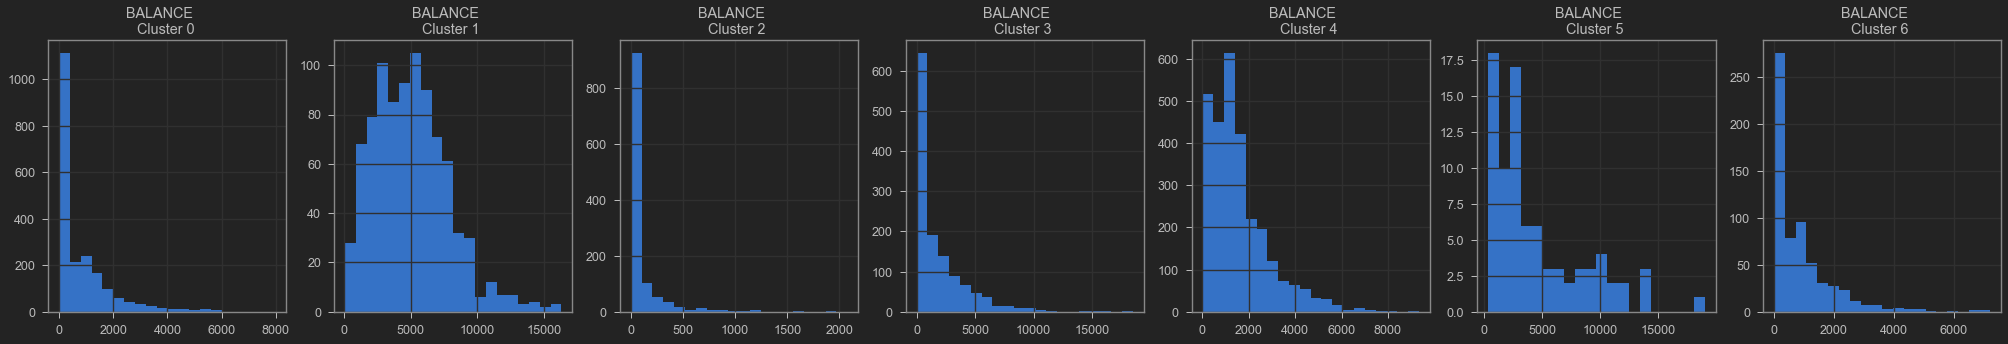

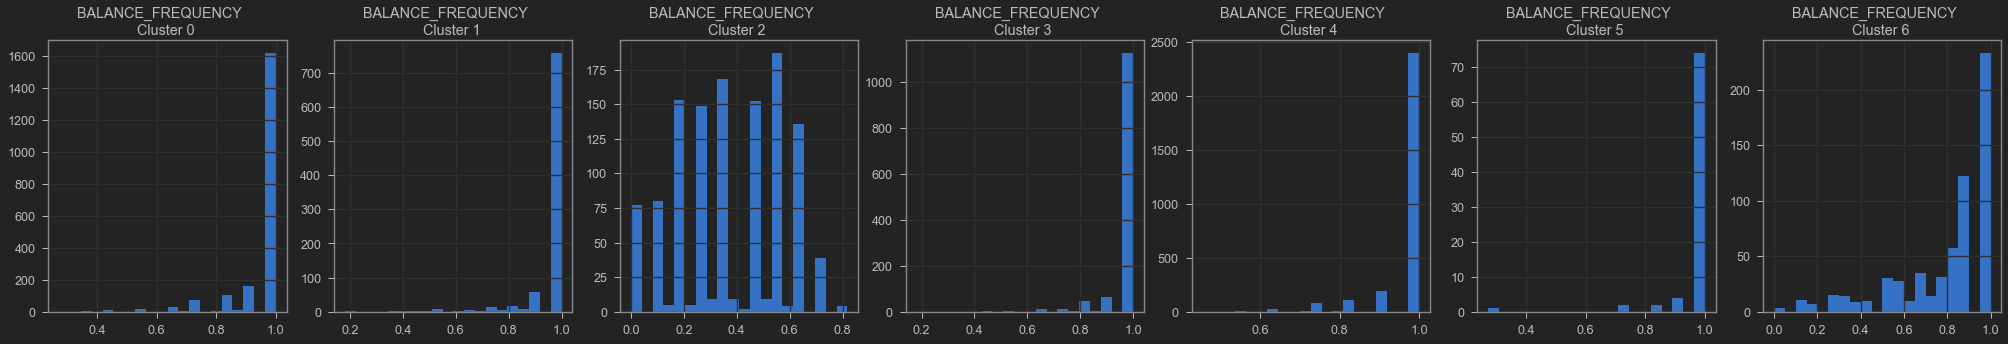

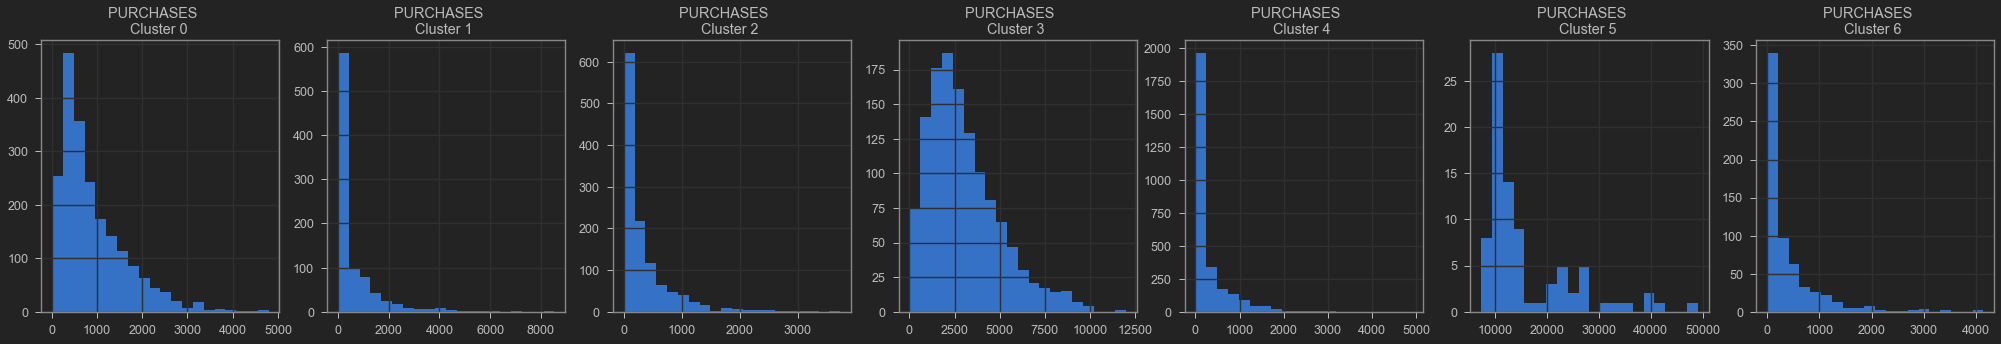

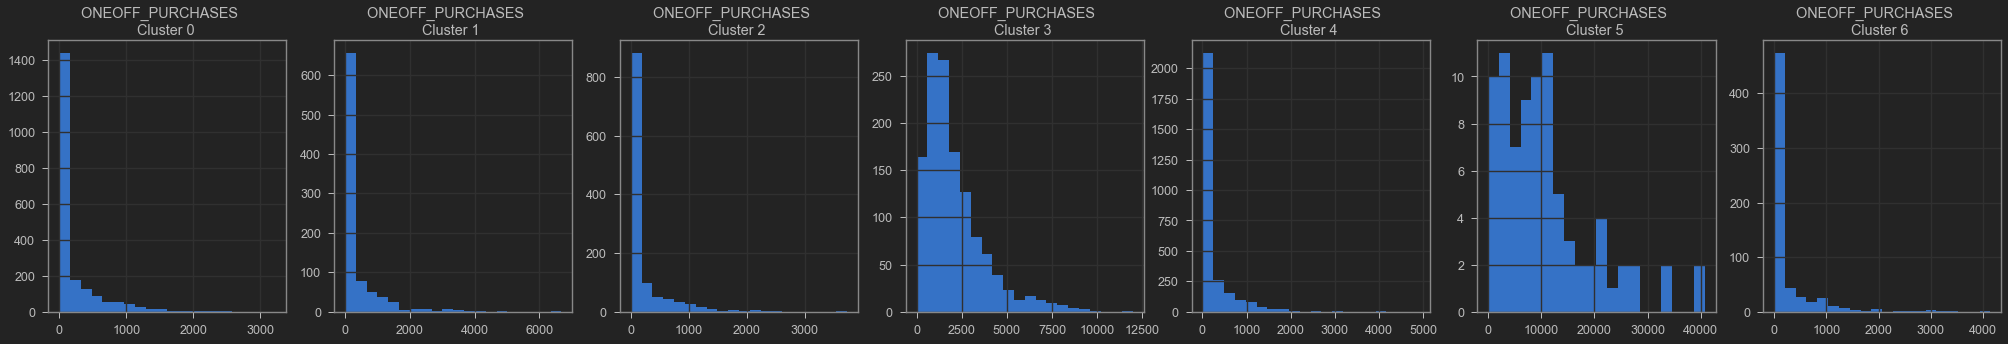

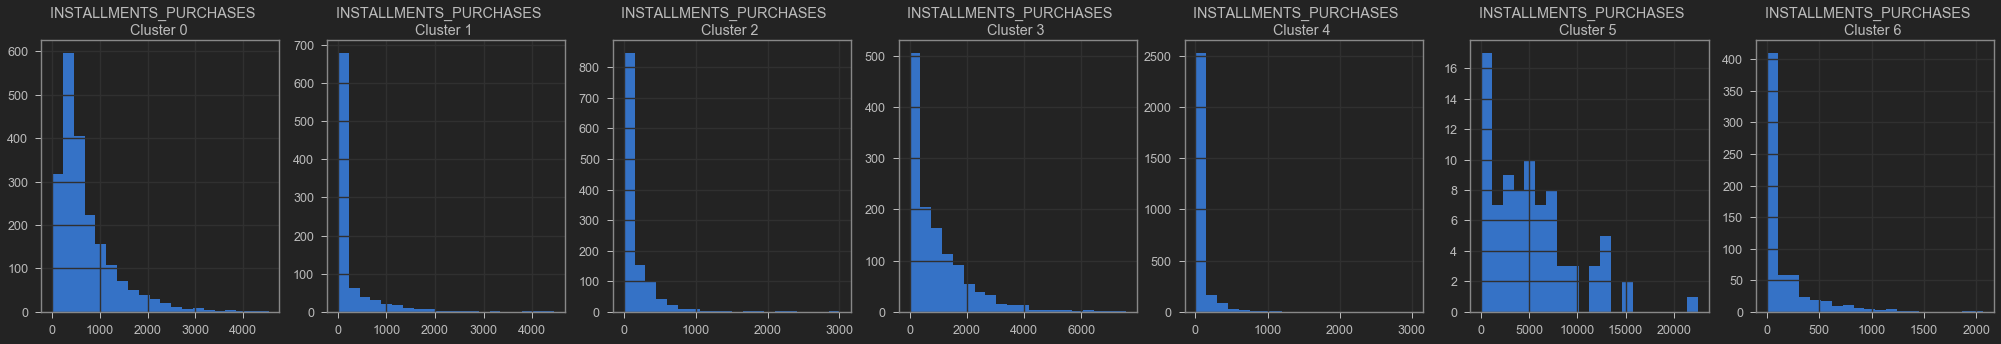

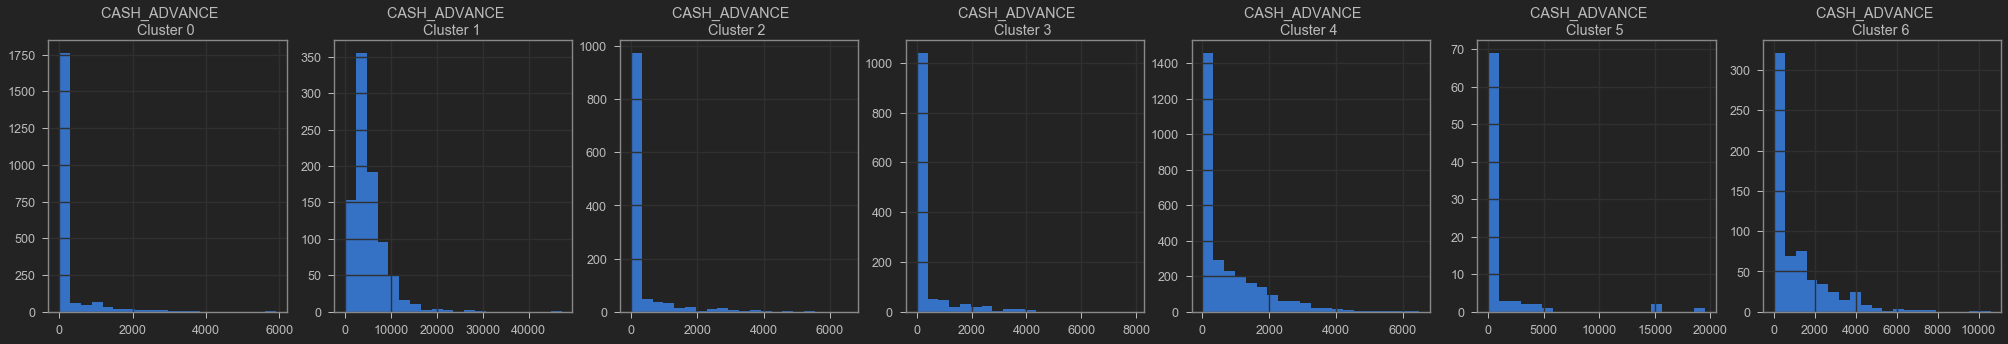

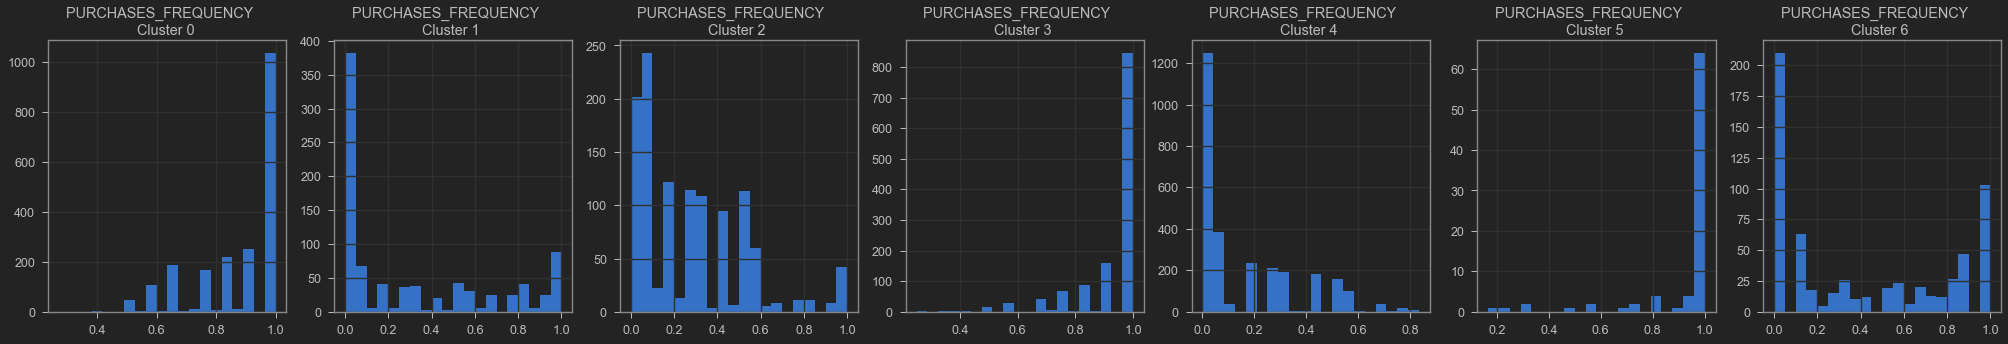

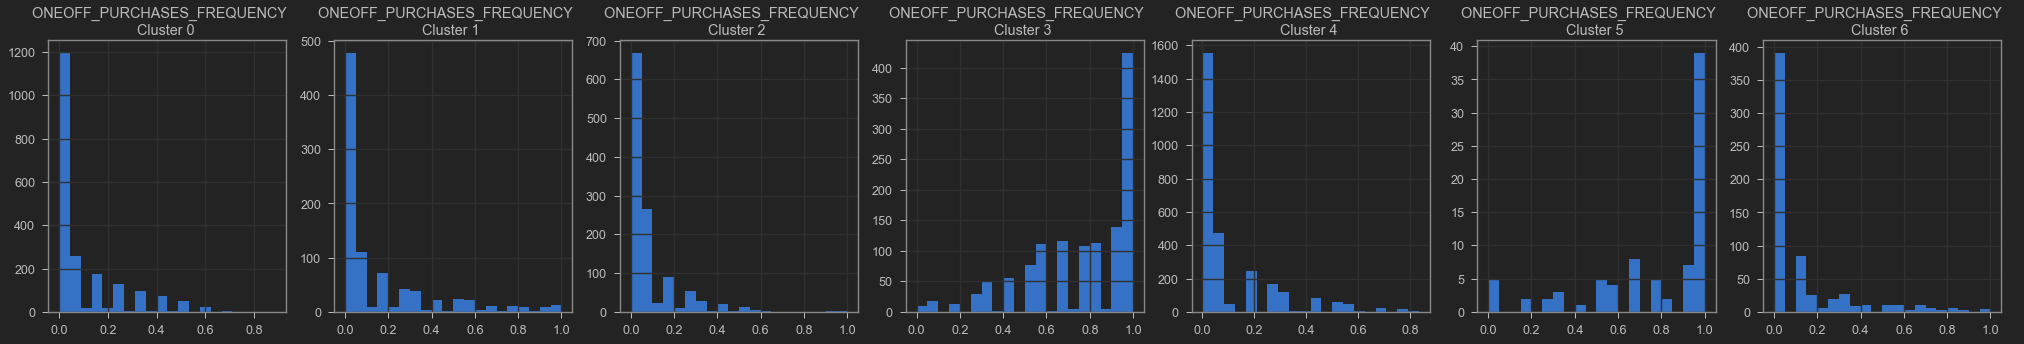

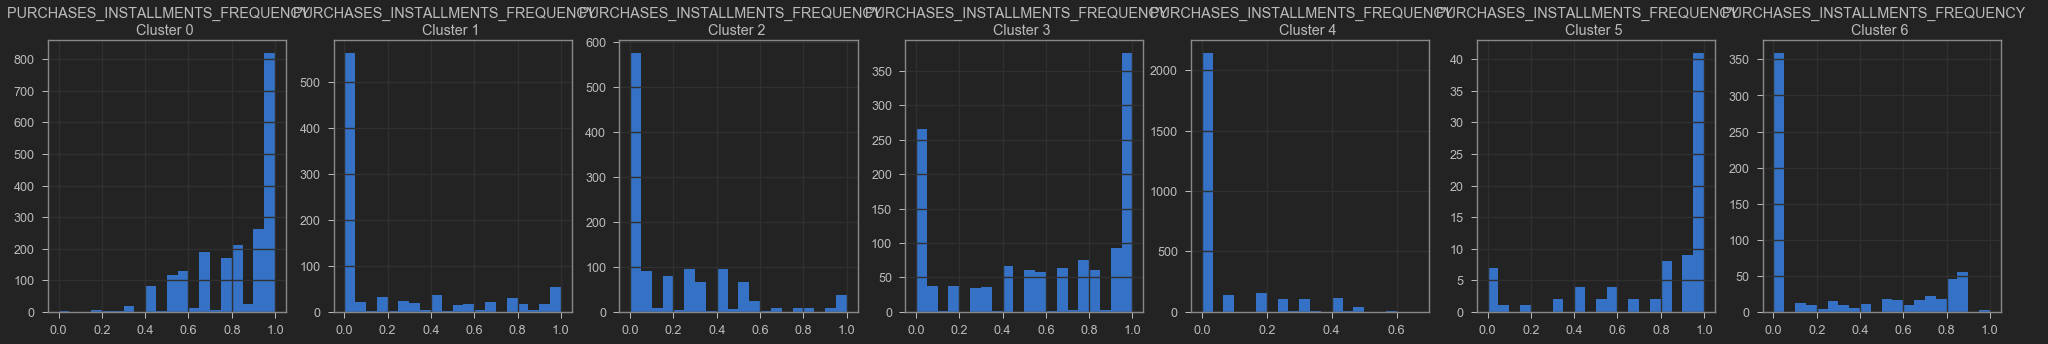

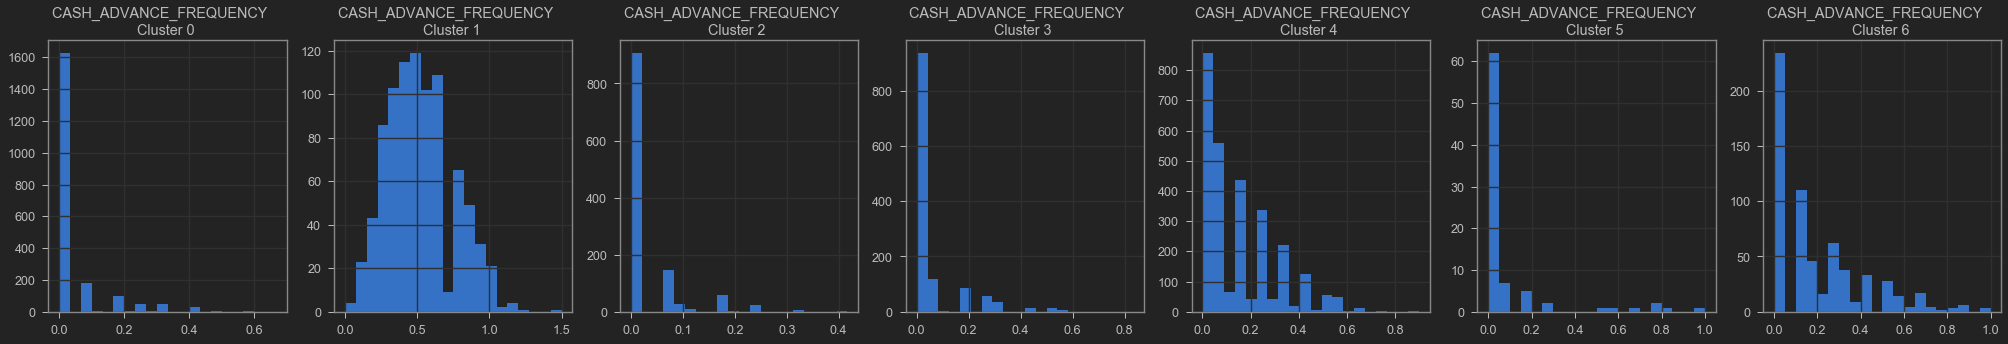

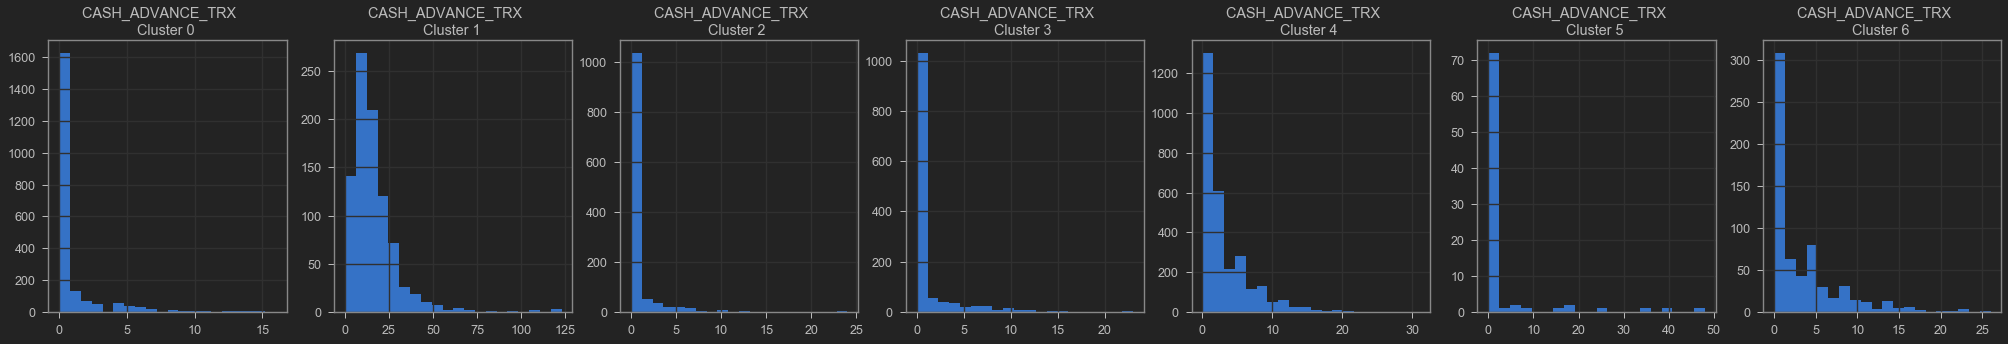

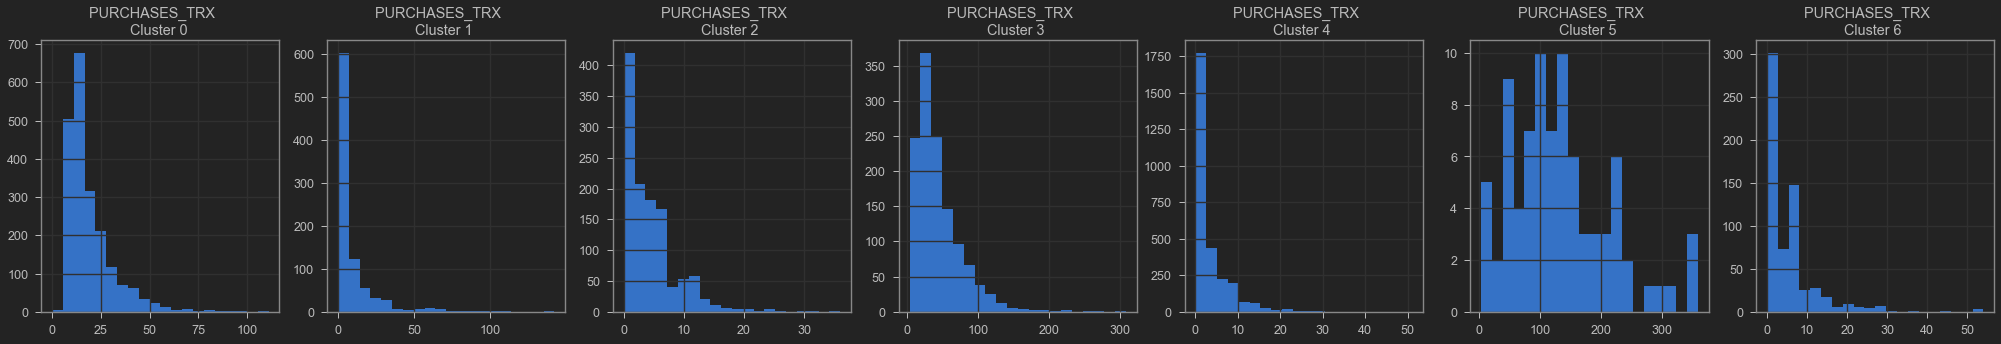

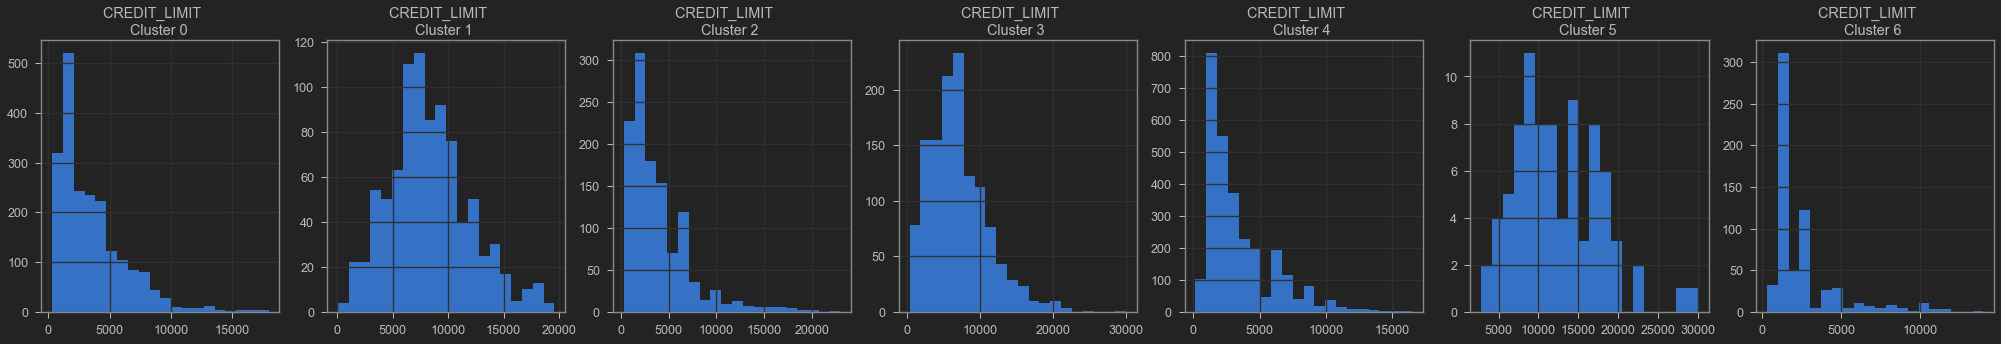

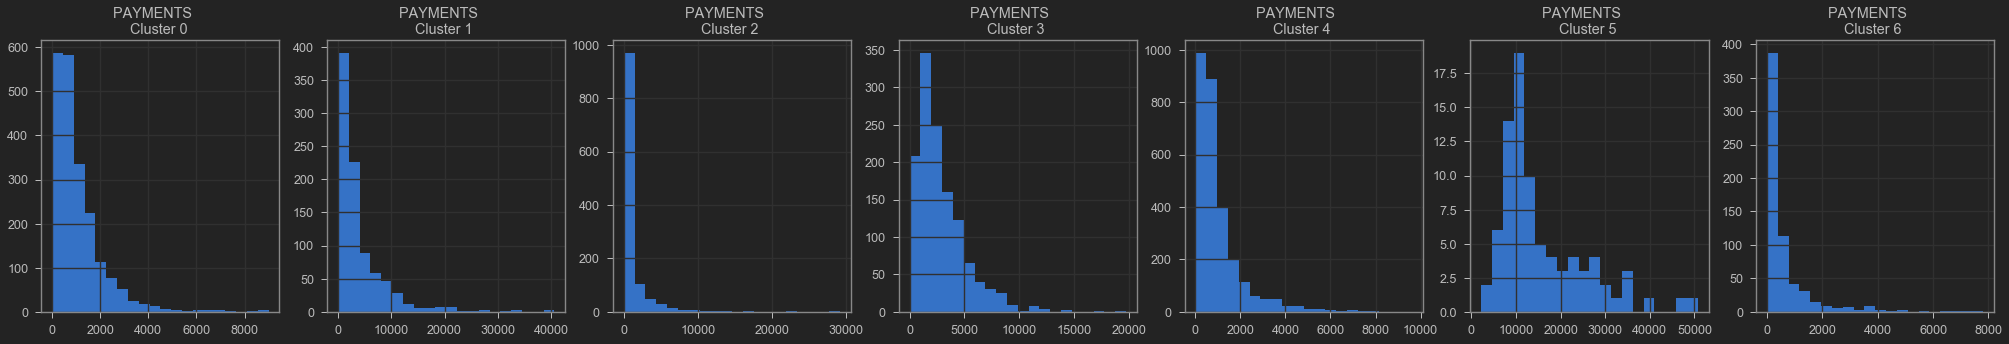

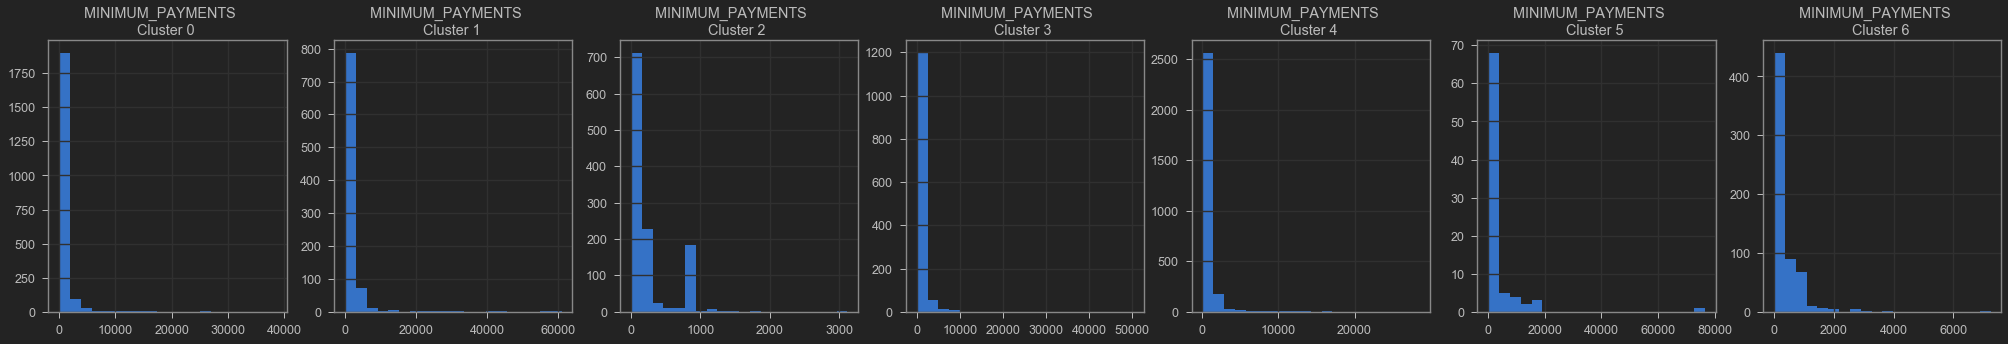

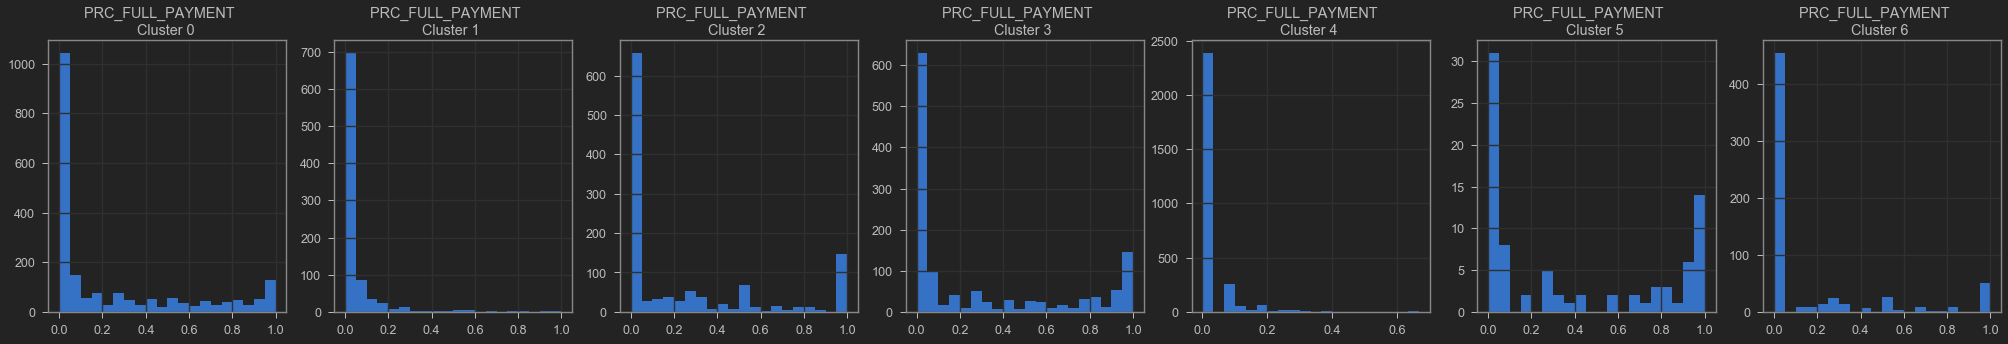

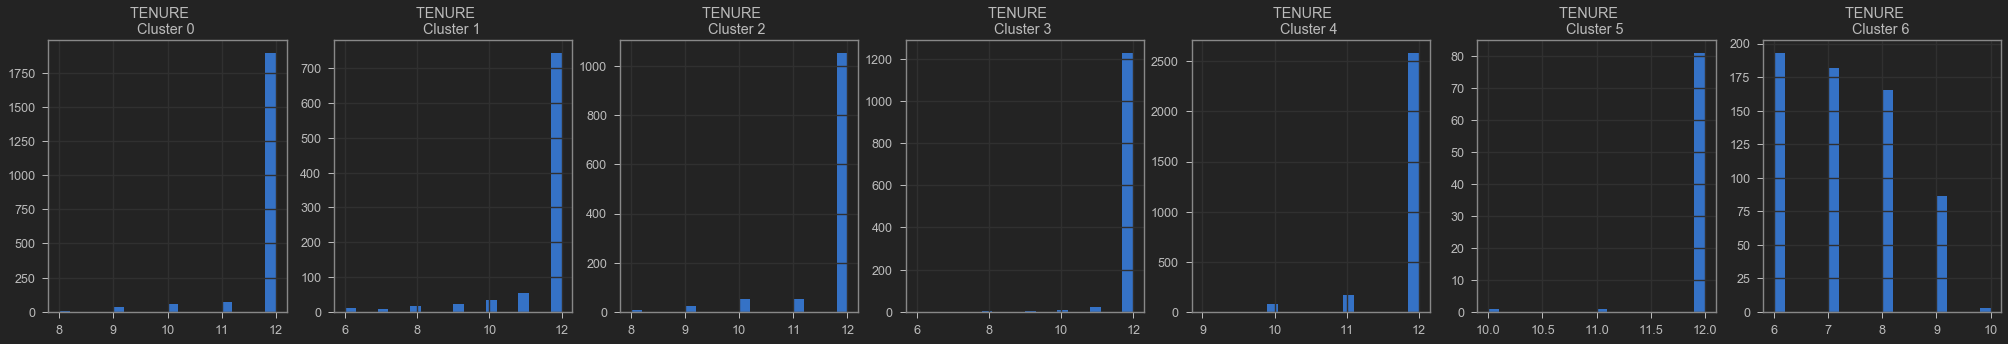

In [30]:
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
    plt.show()

## now we will apply PCA(Principal component Analysis)

In [31]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)

In [32]:
principal_comp

array([[-1.68222029, -1.07645372],
       [-1.13829183,  2.50647563],
       [ 0.969682  , -0.38352136],
       ...,
       [-0.92620521, -1.81078952],
       [-2.3365525 , -0.65796665],
       [-0.55642199, -0.40045871]])

In [33]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

In [34]:
pca_df

,pca1,pca2
0,-1.682220,-1.076454
1,-1.138292,2.506476
2,0.969682,-0.383521
3,-0.873626,0.043163
4,-1.599435,-0.688584
...,...,...
8945,-0.359631,-2.016149
8946,-0.564370,-1.639126
8947,-0.926205,-1.810790
8948,-2.336552,-0.657967


## plotting a scatterplot

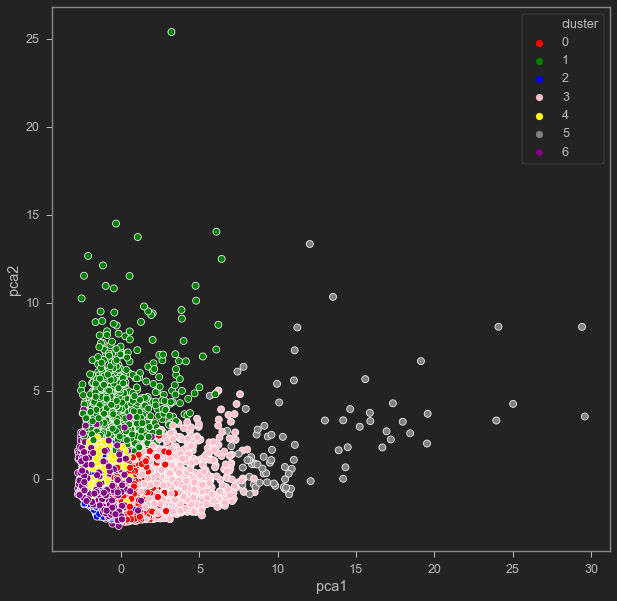

In [39]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2",hue=df_cluster['cluster'], data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()